In [2]:
%pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
# Load the dataset
file_path = 'AcademicPerformance_New.csv'
df = pd.read_csv(file_path)

In [5]:
# 1. Handling Missing Values (Single Column and Whole Dataset)
print("Missing values (before):\n", df.isnull().sum())


Missing values (before):
 Roll No         1
NationalITy     1
WT              8
DSBDA           4
AI             10
Average         1
Grade           1
PG              1
dtype: int64


In [13]:
# Handling a single column - e.g., 'WT' using mean
df['WT'].fillna(df['WT'].mean(), inplace=True)

<ipython-input-13-89773119efc5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WT'].fillna(df['WT'].mean(), inplace=True)


In [7]:
# Handling all other columns
for column in df.columns:
    if df[column].dtype in [np.float64, np.int64]:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

print("\nMissing values (after):\n", df.isnull().sum())


<ipython-input-7-13d18d754a51>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-7-13d18d754a51>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin


Missing values (after):
 Roll No        0
NationalITy    0
WT             0
DSBDA          0
AI             0
Average        0
Grade          0
PG             0
dtype: int64


In [8]:
# 2. Detecting Outliers using Z-Score
numeric_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers = (z_scores > 3)

print("\nOutliers detected:\n", (outliers.sum()))


Outliers detected:
 Roll No    0
WT         1
DSBDA      0
AI         0
Average    0
dtype: int64


In [9]:
# 3. Display and Remove Outliers
outlier_indices = np.where(z_scores > 3)
print("\nOutlier values (sample):")
print(df.iloc[outlier_indices[0]].head())


Outlier values (sample):
    Roll No NationalITy    WT  DSBDA    AI  Average Grade   PG
17     18.0      Rassia  18.0   32.0  28.0     26.0     D  Yes


In [10]:
# Remove outliers
df_clean = df[(z_scores < 3).all(axis=1)]
print("\nData shape after removing outliers:", df_clean.shape)


 (98, 8)pe after removing outliers:


In [11]:
# 4. Data Transformation: Create Bins and Labels for 'Average'
bins = [0, 50, 65, 75, 100]
labels = ['Poor', 'Average', 'Good', 'Excellent']
df_clean['Performance'] = pd.cut(df_clean['Average'], bins=bins, labels=labels)

<ipython-input-11-44eccf7f4824>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Performance'] = pd.cut(df_clean['Average'], bins=bins, labels=labels)


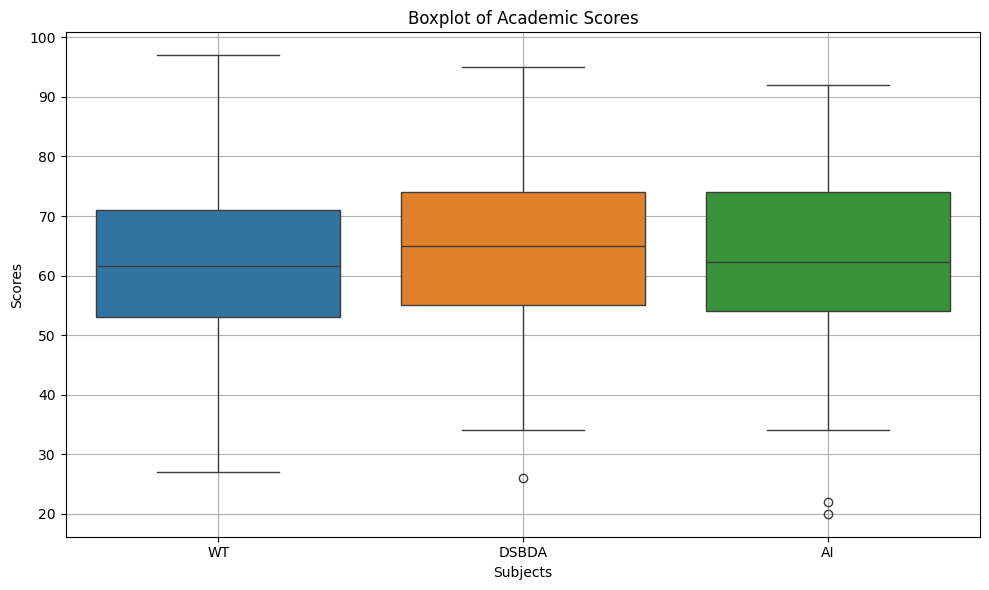

In [12]:
# 5. Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean[['WT', 'DSBDA', 'AI']])
plt.title('Boxplot of Academic Scores')
plt.xlabel('Subjects')
plt.ylabel('Scores')
plt.grid(True)
plt.tight_layout()
plt.show()